In [135]:
pip install pandas_datareader

                                              0.0/109.5 kB ? eta -:--:--
     --------------                           41.0/109.5 kB ? eta -:--:--
     --------------                           41.0/109.5 kB ? eta -:--:--
     ------------------------              71.7/109.5 kB 787.7 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 708.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [136]:
### Data Collection
import pandas_datareader as pdr
key=""

In [137]:
import os

os.environ["TIINGO_API_KEY"] = "4d571506f9066d5402cd04ba5147fa811d8275a8"

In [138]:
df = pdr.get_data_tiingo('AAPL')

C:\Users\suhas\AppData\Local\Temp\ipykernel_20184\1910871400.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL')


In [139]:
df.to_csv("AAPL.csv")

In [140]:
import pandas as pd

In [141]:
df=pd.read_csv("AAPL.csv")

In [142]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-06 00:00:00+00:00,187.97,188.43,185.20,185.42,17485245,44.905787,45.015681,44.244038,44.296596,69940980,0.0,1.0
1,AAPL,2018-07-09 00:00:00+00:00,190.58,190.68,189.30,189.50,19756634,45.529313,45.553203,45.223522,45.271302,79026536,0.0,1.0
2,AAPL,2018-07-10 00:00:00+00:00,190.35,191.28,190.18,190.71,15939149,45.474366,45.696542,45.433753,45.560370,63756596,0.0,1.0
3,AAPL,2018-07-11 00:00:00+00:00,187.88,189.78,187.61,188.50,18831470,44.884286,45.338194,44.819784,45.032404,75325880,0.0,1.0
4,AAPL,2018-07-12 00:00:00+00:00,191.03,191.41,189.31,189.53,18041131,45.636817,45.727599,45.225911,45.278469,72164524,0.0,1.0


In [143]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-06-27 00:00:00+00:00,188.06,188.39,185.67,185.89,50730846,188.06,188.39,185.67,185.89,50730846,0.0,1.0
1252,AAPL,2023-06-28 00:00:00+00:00,189.25,189.90,187.60,187.93,51216801,189.25,189.90,187.60,187.93,51216801,0.0,1.0
1253,AAPL,2023-06-29 00:00:00+00:00,189.59,190.07,188.94,189.08,46347308,189.59,190.07,188.94,189.08,46347308,0.0,1.0
1254,AAPL,2023-06-30 00:00:00+00:00,193.97,194.48,191.26,191.63,85213216,193.97,194.48,191.26,191.63,85213216,0.0,1.0
1255,AAPL,2023-07-03 00:00:00+00:00,192.46,193.88,191.76,193.78,31458198,192.46,193.88,191.76,193.78,31458198,0.0,1.0


In [144]:
df1=df.reset_index()['close']

In [145]:
df1

0       187.97
1       190.58
2       190.35
3       187.88
4       191.03
         ...  
1251    188.06
1252    189.25
1253    189.59
1254    193.97
1255    192.46
Name: close, Length: 1256, dtype: float64

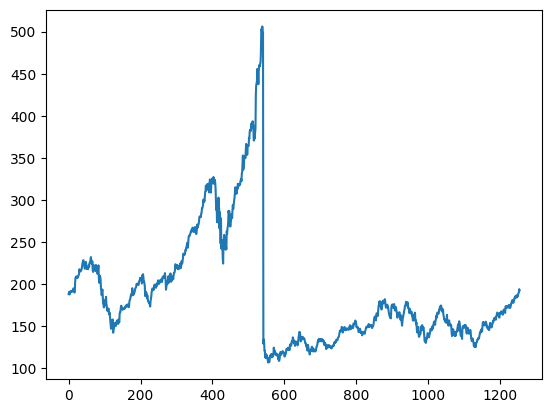

In [146]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [147]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [148]:
import numpy as np

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [151]:

print(df1)

[[0.20320601]
 [0.20974327]
 [0.20916719]
 ...
 [0.20726362]
 [0.21823419]
 [0.2144521 ]]


In [152]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [153]:
training_size,test_size

(816, 440)

In [154]:
train_data

array([[2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],


In [155]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [156]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [157]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [158]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [159]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [160]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [161]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 238ms/step - loss: 0.0459 - val_loss: 0.0062
Epoch 2/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0159 - val_loss: 0.0027
Epoch 3/100
12/12 [==============================] - 2s 157ms/step - loss: 0.0115 - val_loss: 4.4275e-04
Epoch 4/100
12/12 [==============================] - 2s 153ms/step - loss: 0.0099 - val_loss: 4.0946e-04
Epoch 5/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0083 - val_loss: 0.0010
Epoch 6/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0087 - val_loss: 4.9475e-04
Epoch 7/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0073 - val_loss: 3.0682e-04
Epoch 8/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0070 - val_loss: 3.1248e-04
Epoch 9/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0058 - val_loss: 2.8642e-04
Epoch 10/100
12/12 [==============================] - 3s 241ms/step

In [165]:
import tensorflow as tf

In [166]:
tf.__version__

'2.11.0'

In [167]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 37ms/step


In [168]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [169]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.275575112899

In [170]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

157.1163929904837

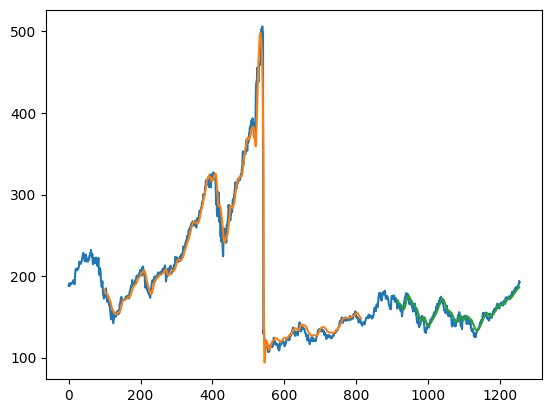

In [171]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [172]:
len(test_data)

440

In [178]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [179]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [180]:
temp_input

[0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.146199123356

In [181]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20328778]
101
1 day input [0.11028178 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512
 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0

In [182]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [183]:
import matplotlib.pyplot as plt

In [184]:
len(df1)

1256

ValueError: x and y must have same first dimension, but have shapes (100,) and (99, 1)

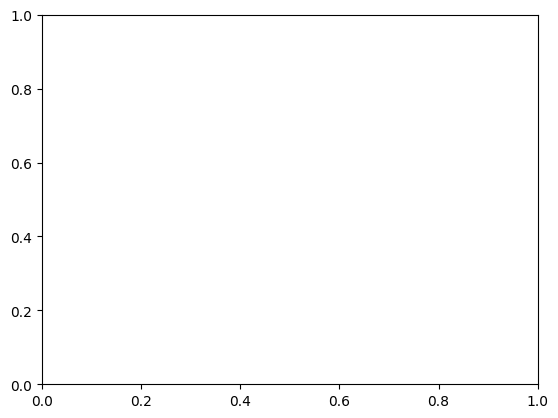

In [189]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

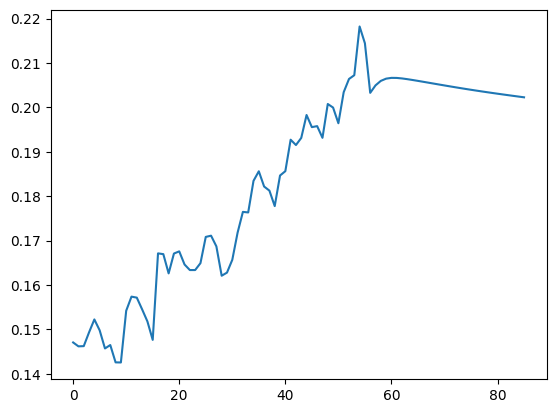

In [186]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [187]:
df3=scaler.inverse_transform(df3).tolist()

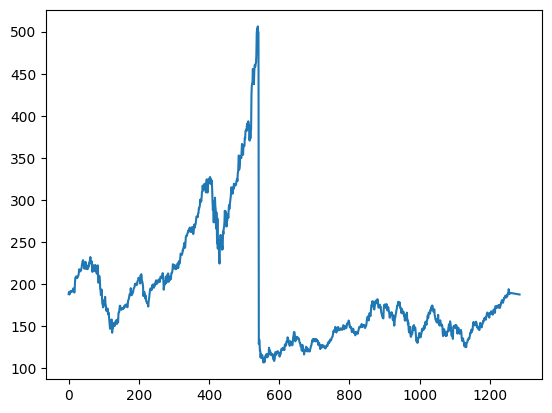

In [188]:
plt.plot(df3)